# To do
- [ ] Clean up headers

# Setup

In [3]:
# For EDA and getting Data
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# For getting Data into SQL
import numpy as np
import requests
from zipfile import *
from configdef import *
from sqlalchemy import exc #SQLAlchemy provides a nice “Pythonic” way of interacting with databases.
from sqlalchemy import event

In [4]:
# Establish db connection

# Get connection details from configdef file into a list
params = config(section='postgres')

# Use sql alchemy to create connection to database, which is contained within the engine object
engine = pg_engine_connection(**params)

# Cleans up unnecessary database connections
engine.dispose()

Postgres Database connection successful


# ifeu environment foodprint

In [33]:
df_foodprint = pd.read_table("data/ifeu_environment_foodprint.tsv")

## Getting the data into SQL

In [34]:
df_foodprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food                      187 non-null    object 
 1   co2_footprint             186 non-null    float64
 2   category                  187 non-null    object 
 3   phosphate_rock_footprint  35 non-null     float64
 4   land_use_footprint        35 non-null     float64
 5   water_footprint           35 non-null     object 
 6   energy_demand             34 non-null     float64
 7   comments                  6 non-null      object 
dtypes: float64(4), object(4)
memory usage: 11.8+ KB


In [36]:
engine.execute("CREATE TABLE IF NOT EXISTS public.agri_ifeu_foodprint (food VARCHAR, co2_footprint FLOAT, category VARCHAR, phosphate_rock_footprint float, land_use_footprint FLOAT, water_footprint VARCHAR, energy_demand FLOAT, comments VARCHAR);")

In [37]:
# Specify which table within your database you want to push your data to. Here: 'agri_fao_emissions'
# If the specified table doesn't exist yet, it will be created
# With 'append', your data will be appended to the already existing data within the table.

df_foodprint.to_sql('agri_ifeu_foodprint', engine, index=False, if_exists="append", 
                  method='multi', chunksize=5000)
print(f'done uploading')

done uploading


## EDA 1 - Getting to know the data

In [18]:
df_foodprint.columns

Index(['food', 'co2_footprint', 'category', 'phosphate_rock_footprint',
       'land_use_footprint', 'water_footprint', 'energy_demand', 'comments'],
      dtype='object')

In [15]:
df_foodprint

food  co2_footprint  \
0                             Apple (organic), average            0.2   
1                                       Apple, average            0.3   
2                              Apple, from New Zealand            0.8   
3                             Apple, regional in April            0.4   
4                            Apple, regional in autumn            0.3   
..                                                 ...            ...   
182        Juice, orange juice, 1.0 L composite carton            0.7   
183  Lemonade, orange lemonade,0.75 L disposable pl...            0.4   
184       Mineral water, 0.7 L returnable glass bottle            0.2   
185                                   Water, tap water            0.0   
186               Wine, 0.75 L disposable glass bottle            1.0   

                 category  phosphate_rock_footprint  land_use_footprint  \
0    Fruit and vegetables                       NaN                 NaN   
1    Fruit and vegetables                       1.0                 0.1   
2    Fruit and vegetables                       NaN                 NaN   
3    Fruit and vegetables                       NaN                 NaN   
4    Fruit and vegetables                       NaN                 NaN   
..                    ...                       ...                 ...   
182             Beverages                       5.0                 0.2   
183             Beverages                       NaN                 NaN   
184             Beverages                       NaN                 NaN   
185             Beverages                       NaN                 NaN   
186             Beverages                       NaN                 NaN   

    water_footprint  energy_demand comments  
0               NaN            NaN      NaN  
1              1500            0.8      NaN  
2               NaN            NaN      NaN  
3               NaN            NaN      NaN  
4               NaN            NaN      NaN  
..              ...            ...      ...  
182           40000            3.0      NaN  
183             NaN            NaN      NaN  
184             NaN            NaN      NaN  
185             NaN            NaN      NaN  
186             NaN            NaN      NaN  

[187 rows x 8 columns]

In [16]:
df_foodprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food                      187 non-null    object 
 1   co2_footprint             186 non-null    float64
 2   category                  187 non-null    object 
 3   phosphate_rock_footprint  35 non-null     float64
 4   land_use_footprint        35 non-null     float64
 5   water_footprint           35 non-null     object 
 6   energy_demand             34 non-null     float64
 7   comments                  6 non-null      object 
dtypes: float64(4), object(4)
memory usage: 11.8+ KB


In [17]:
round(df_foodprint.describe())

co2_footprint  phosphate_rock_footprint  land_use_footprint  \
count          186.0                      35.0                35.0   
mean             2.0                      50.0               430.0   
std              3.0                      68.0              2535.0   
min              0.0                       0.0                 0.0   
25%              0.0                       7.0                 0.0   
50%              1.0                      20.0                 1.0   
75%              3.0                      60.0                 2.0   
max             22.0                     300.0             15000.0   

       energy_demand  
count           34.0  
mean             6.0  
std              7.0  
min              1.0  
25%              2.0  
50%              4.0  
75%              6.0  
max             40.0

In [13]:
df_foodprint.food.hist('co2_footprint');

KeyError: 'co2_footprint'

In [10]:
df_ingredients[['Food product'],['Total_emissions'].hist()

SyntaxError: unexpected EOF while parsing (<ipython-input-10-c47617ea5315>, line 1)

KeyError: 'Food product'

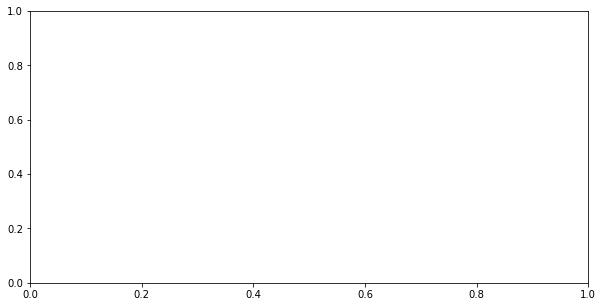

In [11]:
# Bar Chart

fig, ax = plt.subplots(figsize=(10,5))
(
    df_ingredients['Food product']
    .groupby('Total_emissions') # aggregate data to level of airline
    #.count()['FL_DATE'] # count the observations
    .sort_values() # sort the values in descending
    .plot.barh() # Make a bar chart based on the dataframe
)
ax.set_title('Flight Volume by Airline in the USA April 2020')

ax.set_xlabel('Count of Flights');
ax.set_ylabel('Airline Unique Code');

# FAO - Emissions

In [5]:
df_emissions = pd.read_csv("data/Emissions_Agriculture_Agriculture_total_E_All_Data_(Normalized).csv")

In [6]:
df_emissions.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

## Clean up the headers

In [7]:
# make a list column names
cols = df_emissions.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_').lower() for col in cols]
# reassign new column names to dataframe
df_emissions.columns = cols

## Getting the data into SQL

In [25]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523661 entries, 0 to 523660
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area_code     523661 non-null  int64  
 1   area          523661 non-null  object 
 2   item_code     523661 non-null  int64  
 3   item          523661 non-null  object 
 4   element_code  523661 non-null  int64  
 5   element       523661 non-null  object 
 6   year_code     523661 non-null  int64  
 7   year          523661 non-null  int64  
 8   unit          523661 non-null  object 
 9   value         523661 non-null  float64
 10  flag          523661 non-null  object 
 11  note          0 non-null       float64
dtypes: float64(2), int64(5), object(5)
memory usage: 47.9+ MB


In [16]:
engine.execute("CREATE TABLE IF NOT EXISTS public.agri_fao_emissions (area_code INTEGER, area VARCHAR, item_code integer, item VARCHAR, element_code integer, element varchar, year_code integer, year integer, unit varchar, value float, flag varchar, note float);")

In [26]:
# Specify which table within your database you want to push your data to. Here: 'agri_fao_emissions'
# If the specified table doesn't exist yet, it will be created
# With 'append', your data will be appended to the already existing data within the table.

df_emissions.to_sql('agri_fao_emissions', engine, index=False, if_exists="append", 
                  method='multi', chunksize=5000)
print(f'done uploading')

done uploading


## EDA 1 - Getting to know the data

In [8]:
df_emissions

area_code         area  item_code                  item  element_code  \
0               2  Afghanistan       5058  Enteric Fermentation          7225   
1               2  Afghanistan       5058  Enteric Fermentation          7225   
2               2  Afghanistan       5058  Enteric Fermentation          7225   
3               2  Afghanistan       5058  Enteric Fermentation          7225   
4               2  Afghanistan       5058  Enteric Fermentation          7225   
...           ...          ...        ...                   ...           ...   
523656       5873         OECD       1709    Agricultural Soils          7243   
523657       5873         OECD       1709    Agricultural Soils          7243   
523658       5873         OECD       1709    Agricultural Soils          7243   
523659       5873         OECD       1709    Agricultural Soils          7243   
523660       5873         OECD       1709    Agricultural Soils          7243   

                           element  year_code  year       unit        value  \
0                    CH4 emissions       1961  1961  gigagrams     240.6831   
1                    CH4 emissions       1962  1962  gigagrams     245.3106   
2                    CH4 emissions       1963  1963  gigagrams     255.8285   
3                    CH4 emissions       1964  1964  gigagrams     259.0650   
4                    CH4 emissions       1965  1965  gigagrams     265.5980   
...                            ...        ...   ...        ...          ...   
523656  Emissions (CO2eq) from N2O       2016  2016  gigagrams  515243.7721   
523657  Emissions (CO2eq) from N2O       2017  2017  gigagrams  516924.3036   
523658  Emissions (CO2eq) from N2O       2018  2018  gigagrams  513827.4768   
523659  Emissions (CO2eq) from N2O       2030  2030  gigagrams  524388.0749   
523660  Emissions (CO2eq) from N2O       2050  2050  gigagrams  541183.0634   

       flag  note  
0         A   NaN  
1         A   NaN  
2         A   NaN  
3         A   NaN  
4         A   NaN  
...     ...   ...  
523656    A   NaN  
523657    A   NaN  
523658    A   NaN  
523659    A   NaN  
523660    A   NaN  

[523661 rows x 12 columns]

In [39]:
df_emissions.shape

(523661, 12)

In [9]:
df_emissions['item'].unique()

array(['Enteric Fermentation', 'Manure Management', 'Rice Cultivation',
       'Synthetic Fertilizers', 'Manure applied to Soils',
       'Manure left on Pasture', 'Crop Residues',
       'Burning - Crop residues', 'Burning - Savanna',
       'Agriculture total', 'Agricultural Soils',
       'Cultivation of Organic Soils'], dtype=object)

In [10]:
df_emissions['item_code'].unique()

array([5058, 5059, 5060, 5061, 5062, 5063, 5064, 5066, 5067, 1711, 1709,
       6759])

# FAO - Definitions and standards

In [7]:
df_def_and_stand = pd.read_csv("data/FAOSTAT_data_6-28-2021.csv")

In [9]:
df_def_and_stand.columns

Index(['Domain Code', 'Domain', 'Item Code', 'Item', 'Description', 'HS Code',
       'HS07 Code', 'HS12 Code', 'CPC Code'],
      dtype='object')

## Clean up the headers

In [10]:
# make a list column names
cols = df_def_and_stand.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_').lower() for col in cols]
# reassign new column names to dataframe
df_def_and_stand.columns = cols

## Getting the data into SQL

In [27]:
df_def_and_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   domain_code  4348 non-null   object 
 1   domain       4348 non-null   object 
 2   item_code    4348 non-null   int64  
 3   item         4348 non-null   object 
 4   description  3558 non-null   object 
 5   hs_code      11 non-null     float64
 6   hs07_code    2917 non-null   object 
 7   hs12_code    2917 non-null   object 
 8   cpc_code     3115 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 305.8+ KB


In [29]:
engine.execute("CREATE TABLE IF NOT EXISTS public.agri_fao_definition (domain_code VARCHAR, domain VARCHAR, item_code INTEGER, item VARCHAR, description VARCHAR, hs_code FLOAT, hs07_code VARCHAR, hs12_code VARCHAR, cpc_code VARCHAR);")

In [31]:
# Specify which table within your database you want to push your data to. Here: 'agri_fao_definitions'
# If the specified table doesn't exist yet, it will be created
# With 'append', your data will be appended to the already existing data within the table.

df_def_and_stand.to_sql('agri_fao_definition', engine, index=False, if_exists="append", 
                  method='multi', chunksize=5000)
print(f'done uploading')

done uploading


## EDA 1 - Getting to know the data

In [11]:
df_def_and_stand

domain_code                                             domain  \
0             EI  Agri-Environmental Indicators: Emissions inten...   
1             EI  Agri-Environmental Indicators: Emissions inten...   
2             EI  Agri-Environmental Indicators: Emissions inten...   
3             EI  Agri-Environmental Indicators: Emissions inten...   
4             EI  Agri-Environmental Indicators: Emissions inten...   
...          ...                                                ...   
4343          TI                               Trade: Trade Indices   
4344          TI                               Trade: Trade Indices   
4345          TI                               Trade: Trade Indices   
4346          TI                               Trade: Trade Indices   
4347          TI                               Trade: Trade Indices   

      item_code                          item  \
0          1718        Cereals excluding rice   
1          1062           Eggs, hen, in shell   
2           947                 Meat, buffalo   
3           867                  Meat, cattle   
4          1058                 Meat, chicken   
...         ...                           ...   
4343        988               Wool, degreased   
4344        987                  Wool, greasy   
4345       1009              Wool, hair waste   
4346        891                       Yoghurt   
4347        892  Yoghurt, concentrated or not   

                                            description  hs_code  \
0                                                   NaN      NaN   
1                                      Weight in shell.      NaN   
2     Fresh, chilled or frozen, with bone in or bone...      NaN   
3     Meat of bovine animals, fresh, chilled or froz...      NaN   
4     Fresh, chilled or frozen. May include all type...      NaN   
...                                                 ...      ...   
4343  Includes scoured and carbonized, but does not ...      NaN   
4344  A natural fibre taken from sheep or lambs. Inc...      NaN   
4345  Noils of wool or animal hair not garnetted; ot...      NaN   
4346                             A fermented milk food.      NaN   
4347  Includes additives such as sugar, flavouring m...      NaN   

                                              hs07_code  \
0                                                   NaN   
1                                                040700   
2        020110, 020120, 020130, 020210, 020220, 020230   
3                        020110, 020120, 020210, 020220   
4     020711, 020712, 020713, 020714, 020732, 020733...   
...                                                 ...   
4343                             510121, 510129, 510130   
4344                                     510111, 510119   
4345                             510310, 510320, 510330   
4346                                             040310   
4347                                             040310   

                                           hs12_code  cpc_code  
0                                                NaN       NaN  
1                             040711, 040721, 040790      0231  
2     020110, 020120, 020130, 020210, 020220, 020230     21112  
3                     020110, 020120, 020210, 020220  21111.01  
4             020711, 020712, 020713, 020714, 020760     21121  
...                                              ...       ...  
4343                          510121, 510129, 510130     26130  
4344                                  510111, 510119     02941  
4345                          510310, 510320, 510330     F1009  
4346                                          040310  22230.01  
4347                                          040310  22230.02  

[4348 rows x 9 columns]

In [12]:
df_def_and_stand.shape

(4348, 9)

In [13]:
df_def_and_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   domain_code  4348 non-null   object 
 1   domain       4348 non-null   object 
 2   item_code    4348 non-null   int64  
 3   item         4348 non-null   object 
 4   description  3558 non-null   object 
 5   hs_code      11 non-null     float64
 6   hs07_code    2917 non-null   object 
 7   hs12_code    2917 non-null   object 
 8   cpc_code     3115 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 305.8+ KB


## Recipes for foodprint

In [3]:
df_foodprint_recipes = pd.read_table("data/recipes_foodprint.tsv")

### Getting the data into SQL

In [4]:
df_foodprint_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food                        188 non-null    object 
 1   recipe_zwiebelkuchen        7 non-null      float64
 2   recipe_wiener_schnitzel     0 non-null      float64
 3   recipe_bratkartoffeln       4 non-null      float64
 4   recipe_spaghetti_bolognese  7 non-null      float64
 5   recipe_pizza                8 non-null      float64
 6   recipe_kohlroulade          0 non-null      float64
 7   recipe_wurststulle          3 non-null      float64
dtypes: float64(7), object(1)
memory usage: 11.9+ KB


In [5]:
# Specify which table within your database you want to push your data to. Here: 'agri_fao_emissions'
# If the specified table doesn't exist yet, it will be created
# With 'append', your data will be appended to the already existing data within the table.

df_foodprint_recipes.to_sql('agri_foodprint_recipes', engine, index=False, if_exists="append", 
                  method='multi', chunksize=5000)
print(f'done uploading')

done uploading
